In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.shape

(145460, 23)

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
df.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [7]:
# Perform undersampling to balance dataset
num_Yes = len(df[df['RainTomorrow'] == 'Yes'])
num_No = len(df[df['RainTomorrow'] == 'No'])
Yes_indices = df[df.RainTomorrow == 'Yes'].index
No_indices = df[df.RainTomorrow == 'No'].index
random_indices = np.random.choice(No_indices,num_Yes, replace=False)
under_sample_indices = np.concatenate([Yes_indices,random_indices])
under_sample = df.loc[under_sample_indices]
print(under_sample.groupby(['RainTomorrow']).size())

RainTomorrow
No     31877
Yes    31877
dtype: int64


In [8]:
under_sample.isnull().sum()

Date                 0
Location             0
MinTemp            300
MaxTemp            115
Rainfall           872
Evaporation      27526
Sunshine         30264
WindGustDir       4453
WindGustSpeed     4416
WindDir9am        4278
WindDir3pm        1838
WindSpeed9am       623
WindSpeed3pm      1245
Humidity9am        872
Humidity3pm       1738
Pressure9am       6252
Pressure3pm       6246
Cloud9am         23465
Cloud3pm         24646
Temp9am            458
Temp3pm           1332
RainToday          872
RainTomorrow         0
dtype: int64

In [9]:
under_sample

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
10,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
11,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
12,2008-12-13,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
16,2008-12-17,Albury,14.1,20.9,0.0,NaN,NaN,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12339,2009-09-30,Moree,5.1,26.9,0.0,6.4,11.5,NNW,30.0,NE,...,23.0,9.0,1019.5,1015.3,0.0,0.0,20.4,26.4,No,No
139840,2010-06-30,Darwin,22.2,32.0,0.0,7.0,7.8,E,41.0,E,...,59.0,43.0,1014.6,1010.4,4.0,7.0,25.4,30.7,No,No
103747,2012-05-09,Nuriootpa,8.3,22.2,0.0,7.2,8.7,W,54.0,NW,...,77.0,35.0,1018.4,1018.3,5.0,2.0,16.8,20.5,No,No
117097,2016-01-11,PearceRAAF,13.9,29.3,0.0,NaN,7.9,W,44.0,SW,...,60.0,50.0,1012.9,1011.4,4.0,3.0,24.3,27.1,No,No


In [10]:
# Fill missing values
from sklearn.impute import SimpleImputer
categorical_features = under_sample[['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']]
numerical_features = under_sample.drop(['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow','Date','Location'], axis = 1)

numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

complete_numerical = numerical_imputer.fit_transform(numerical_features)
complete_categorical = categorical_imputer.fit_transform(categorical_features)

In [11]:
df2=pd.DataFrame(complete_numerical)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,9.7,31.9,0.0,5.144725,6.493488,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,5.054804,5.195126,18.3,30.2
1,13.4,30.4,0.0,5.144725,6.493488,30.0,17.0,6.0,48.0,22.0,1011.8,1008.7,5.054804,5.195126,20.4,28.8
2,15.9,21.7,2.2,5.144725,6.493488,31.0,15.0,13.0,89.0,91.0,1010.5,1004.2,8.000000,8.000000,15.9,17.0
3,15.9,18.6,15.6,5.144725,6.493488,61.0,28.0,28.0,76.0,93.0,994.3,993.0,8.000000,8.000000,17.4,15.8
4,14.1,20.9,0.0,5.144725,6.493488,22.0,11.0,9.0,69.0,82.0,1012.2,1010.4,8.000000,1.000000,17.2,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63749,5.1,26.9,0.0,6.400000,11.500000,30.0,17.0,11.0,23.0,9.0,1019.5,1015.3,0.000000,0.000000,20.4,26.4
63750,22.2,32.0,0.0,7.000000,7.800000,41.0,22.0,24.0,59.0,43.0,1014.6,1010.4,4.000000,7.000000,25.4,30.7
63751,8.3,22.2,0.0,7.200000,8.700000,54.0,17.0,30.0,77.0,35.0,1018.4,1018.3,5.000000,2.000000,16.8,20.5
63752,13.9,29.3,0.0,5.144725,7.900000,44.0,9.0,26.0,60.0,50.0,1012.9,1011.4,4.000000,3.000000,24.3,27.1


In [12]:
df2.columns=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']
df2

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,9.7,31.9,0.0,5.144725,6.493488,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,5.054804,5.195126,18.3,30.2
1,13.4,30.4,0.0,5.144725,6.493488,30.0,17.0,6.0,48.0,22.0,1011.8,1008.7,5.054804,5.195126,20.4,28.8
2,15.9,21.7,2.2,5.144725,6.493488,31.0,15.0,13.0,89.0,91.0,1010.5,1004.2,8.000000,8.000000,15.9,17.0
3,15.9,18.6,15.6,5.144725,6.493488,61.0,28.0,28.0,76.0,93.0,994.3,993.0,8.000000,8.000000,17.4,15.8
4,14.1,20.9,0.0,5.144725,6.493488,22.0,11.0,9.0,69.0,82.0,1012.2,1010.4,8.000000,1.000000,17.2,18.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63749,5.1,26.9,0.0,6.400000,11.500000,30.0,17.0,11.0,23.0,9.0,1019.5,1015.3,0.000000,0.000000,20.4,26.4
63750,22.2,32.0,0.0,7.000000,7.800000,41.0,22.0,24.0,59.0,43.0,1014.6,1010.4,4.000000,7.000000,25.4,30.7
63751,8.3,22.2,0.0,7.200000,8.700000,54.0,17.0,30.0,77.0,35.0,1018.4,1018.3,5.000000,2.000000,16.8,20.5
63752,13.9,29.3,0.0,5.144725,7.900000,44.0,9.0,26.0,60.0,50.0,1012.9,1011.4,4.000000,3.000000,24.3,27.1


In [13]:
df3=pd.DataFrame(complete_categorical)
df3

,0,1,2,3,4
0,NNW,SE,NW,No,Yes
1,N,SSE,ESE,No,Yes
2,NNE,NE,ENE,Yes,Yes
3,W,NNW,NNW,Yes,Yes
4,ENE,SSW,E,No,Yes
...,...,...,...,...,...
63749,NNW,NE,NE,No,No
63750,E,E,E,No,No
63751,W,NW,W,No,No
63752,W,SW,WSW,No,No


In [14]:
df3.columns=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
df3

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,NNW,SE,NW,No,Yes
1,N,SSE,ESE,No,Yes
2,NNE,NE,ENE,Yes,Yes
3,W,NNW,NNW,Yes,Yes
4,ENE,SSW,E,No,Yes
...,...,...,...,...,...
63749,NNW,NE,NE,No,No
63750,E,E,E,No,No
63751,W,NW,W,No,No
63752,W,SW,WSW,No,No


In [15]:
df3["Location"]=list(under_sample["Location"])
df3

,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Location
0,NNW,SE,NW,No,Yes,Albury
1,N,SSE,ESE,No,Yes,Albury
2,NNE,NE,ENE,Yes,Yes,Albury
3,W,NNW,NNW,Yes,Yes,Albury
4,ENE,SSW,E,No,Yes,Albury
...,...,...,...,...,...,...
63749,NNW,NE,NE,No,No,Moree
63750,E,E,E,No,No,Darwin
63751,W,NW,W,No,No,Nuriootpa
63752,W,SW,WSW,No,No,PearceRAAF


In [16]:
dummy_cat=pd.get_dummies(df3,drop_first=True)
dummy_cat

,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63749,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
complete_data = pd.concat([df2,dummy_cat], axis=1)

In [20]:
complete_data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera
0,9.7,31.9,0.0,5.144725,6.493488,80.0,7.0,28.0,42.0,9.0,...,0,0,0,0,0,0,0,0,0,0
1,13.4,30.4,0.0,5.144725,6.493488,30.0,17.0,6.0,48.0,22.0,...,0,0,0,0,0,0,0,0,0,0
2,15.9,21.7,2.2,5.144725,6.493488,31.0,15.0,13.0,89.0,91.0,...,0,0,0,0,0,0,0,0,0,0
3,15.9,18.6,15.6,5.144725,6.493488,61.0,28.0,28.0,76.0,93.0,...,0,0,0,0,0,0,0,0,0,0
4,14.1,20.9,0.0,5.144725,6.493488,22.0,11.0,9.0,69.0,82.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63749,5.1,26.9,0.0,6.400000,11.500000,30.0,17.0,11.0,23.0,9.0,...,0,0,0,0,0,0,0,0,0,0
63750,22.2,32.0,0.0,7.000000,7.800000,41.0,22.0,24.0,59.0,43.0,...,0,0,0,0,0,0,0,0,0,0
63751,8.3,22.2,0.0,7.200000,8.700000,54.0,17.0,30.0,77.0,35.0,...,0,0,0,0,0,0,0,0,0,0
63752,13.9,29.3,0.0,5.144725,7.900000,44.0,9.0,26.0,60.0,50.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X = complete_data.drop(columns=["RainTomorrow_Yes"])
y = complete_data.RainTomorrow_Yes

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
#Use logistic regression to train the model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [25]:
predictions = logmodel.predict(X_test)
predictions

array([0, 1, 0, ..., 0, 1, 1], dtype=uint8)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7889371046165107

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[7699, 1899],
       [2138, 7391]], dtype=int64)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [29]:
logmodel_PCA = LogisticRegression(random_state=0)
logmodel_PCA.fit(X_train_pca, y_train)

LogisticRegression(random_state=0)

In [30]:
predictions_PCA = logmodel_PCA.predict(X_test_pca)

In [31]:
accuracy_score(y_test, predictions_PCA)

0.7599205311862812

In [32]:
confusion_matrix(y_test, predictions_PCA)

array([[7330, 2268],
       [2324, 7205]], dtype=int64)

In [33]:
from sklearn.metrics import classification_report
print(f"Report\n {classification_report(y_test,predictions_PCA)}")

Report
               precision    recall  f1-score   support

           0       0.76      0.76      0.76      9598
           1       0.76      0.76      0.76      9529

    accuracy                           0.76     19127
   macro avg       0.76      0.76      0.76     19127
weighted avg       0.76      0.76      0.76     19127



In [ ]:
#Use KNN Classifier to train the model
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics

#Try running from k=1 through 25 and record testing accuracy
k_range = range(1000,1001)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_pca, y_train)
        y_pred=knn.predict(X_test_pca)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

In [ ]:
scores

{1: 0.6959454160458003,
 2: 0.6867696651243039,
 3: 0.7258254254568269,
 4: 0.7200219590620344,
 5: 0.7364128303662458,
 6: 0.733354246725747,
 7: 0.7473923613834209,
 8: 0.7450396047368834,
 9: 0.752411575562701,
 10: 0.750529370245471,
 11: 0.7559407105325072,
 12: 0.7528037016704572,
 13: 0.7587640185083523,
 14: 0.7588424437299035,
 15: 0.7623715786997098,
 16: 0.7607246490471335,
 17: 0.7636263822445298,
 18: 0.762450003921261,
 19: 0.7639400831307348}

In [ ]:
scores

{20: 0.7638616579091836,
 21: 0.7652733118971061,
 22: 0.7640185083522861,
 23: 0.7650380362324524,
 24: 0.7648811857893498,
 25: 0.7667633911065799,
 26: 0.7660575641126186,
 27: 0.7676260685436437,
 28: 0.7675476433220924,
 29: 0.7679397694298487,
 30: 0.7678613442082974,
 31: 0.7673907928789899,
 32: 0.7687240216453611,
 33: 0.7699788251901811,
 34: 0.7695082738608736,
 35: 0.7696651243039762,
 36: 0.7681750450945024,
 37: 0.7687240216453611,
 38: 0.7684103207591562,
 39: 0.7678613442082974}

In [ ]:
scores

{1000: 0.7576660654066347}

In [34]:
# Use Randomforest Classifier to the model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(X_train_pca, y_train)

RandomForestClassifier(n_estimators=20)

In [35]:
y_pred = classifier.predict(X_test_pca)

In [36]:
confusion_matrix(y_test, y_pred)

array([[7552, 2046],
       [2502, 7027]], dtype=int64)

In [37]:
print(f"Report\n {classification_report(y_test,y_pred)}")

Report
               precision    recall  f1-score   support

           0       0.75      0.79      0.77      9598
           1       0.77      0.74      0.76      9529

    accuracy                           0.76     19127
   macro avg       0.76      0.76      0.76     19127
weighted avg       0.76      0.76      0.76     19127



In [38]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='macro')

0.7620416667058751

In [ ]:
for i in [10,100,500]:
  classifier = RandomForestClassifier(n_estimators=i)
  classifier.fit(X_train_pca, y_train)
  y_pred = classifier.predict(X_test_pca)
  confusion_matrix(y_test, y_pred)
  k=f1_score(y_test,y_pred,average='macro')
  print("i:",i,"f1:",k)


i: 10 f1: 0.7472948554503247
i: 100 f1: 0.7720492184220056
i: 500 f1: 0.7741393987232158


In [ ]:
for i in [1000,2000]:
    classifier = RandomForestClassifier(n_estimators=i)
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)
    confusion_matrix(y_test, y_pred)
    k=f1_score(y_test,y_pred,average='macro')
    print("i:",i,"f1:",k)

i: 1000 f1: 0.7746614850494005
i: 2000 f1: 0.7751839828456234


In [52]:
for i in [2,10,100,500,1000]:
    classifier = RandomForestClassifier(n_estimators=1000, min_samples_leaf = i)
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)
    confusion_matrix(y_test, y_pred)
    k=f1_score(y_test,y_pred,average='macro')
    print("i:",i,"f1:",k)

i: 2 f1: 0.7731996668456952
i: 10 f1: 0.772258656346712
i: 100 f1: 0.7605434074639721
i: 500 f1: 0.7504920722375428
i: 1000 f1: 0.7447631093325422


In [39]:
#Use XGBoost to train the model
from xgboost import XGBClassifier

xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
xgboostModel.fit(X_train_pca, y_train)
predicted = xgboostModel.predict(X_test_pca)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:12] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [40]:
print(f"Report\n {classification_report(y_test,predicted)}")

Report
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      9598
           1       0.77      0.77      0.77      9529

    accuracy                           0.77     19127
   macro avg       0.77      0.77      0.77     19127
weighted avg       0.77      0.77      0.77     19127



In [44]:
#Use LightGBM to train the model
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)
y_pred_proba = model.predict_proba(X_test_pca)

from sklearn.metrics import roc_auc_score
LightGBM_score = roc_auc_score(y_test, y_pred_proba[:,1])
LightGBM_score

0.8570441552050527

In [45]:
print(f"Report\n {classification_report(y_test,y_pred)}")

Report
               precision    recall  f1-score   support

           0       0.77      0.78      0.78      9598
           1       0.78      0.77      0.77      9529

    accuracy                           0.77     19127
   macro avg       0.77      0.77      0.77     19127
weighted avg       0.77      0.77      0.77     19127



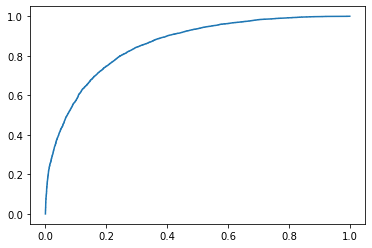

In [49]:
from sklearn import metrics
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test.values, y_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.show()